<a href="https://colab.research.google.com/github/marianamartins228/ProjetoBootcampRestart2025/blob/main/Projeto_Bootcamp_Restart_Data_Girls_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

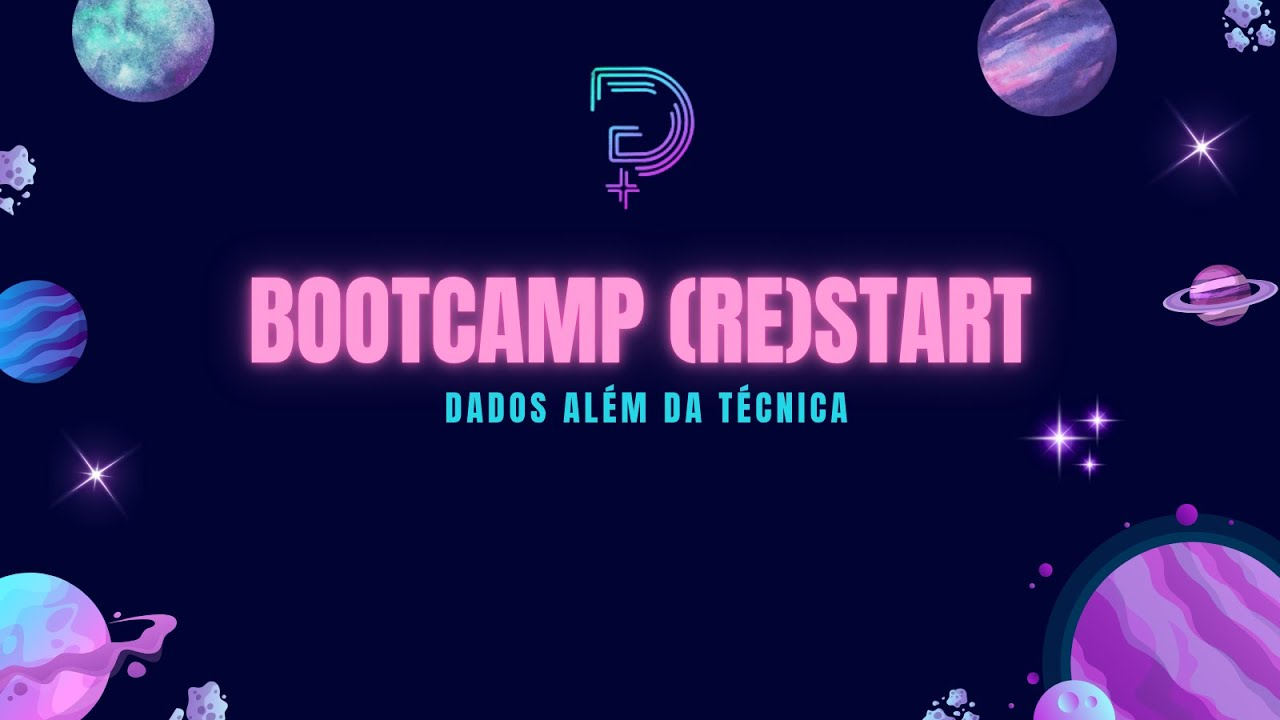

---

# Leitura & Exploração Inicial + Limpeza & Preparação dos Dados

Neste projeto, vamos analisar o conjunto de dados “IBM HR Analytics Attrition & Performance” para entender a rotatividade de colaboradores e seus motivos. O objetivo é descobrir padrões e fatores que influenciam a rotatividade, ajudando a empresa fictícia Data Girls S.A a tomar decisões mais estratégicas na área de Recursos Humanos. Ao final, será criado um dashboard interativo com os principais resultados. A primeira tecnologia utilizada foi o Python através do Google Colab com o objetivo de fazer a examinação e tratamento inicial dos dados:

In [104]:
# importação das bibliotecas que poderão ser utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import duckdb

In [105]:
# leitura do dataset e impressão das primeiras linhas
df = pd.read_csv('/RH-DATASET.csv')
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [106]:
# lista de colunas
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

A checagem de valores nulos abaixo revelou que eles não existem, sendo assim não é necessário efetuar nenhum tratamento.

In [107]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Por precaução também verifiquei se existe algum código de funcionário duplicado, mas não há.

In [108]:
df['EmployeeNumber'].duplicated().sum()

np.int64(0)

Inicialmente os dados revelam que é uma base de dados de funcionários e ex funcionários, em que são disponibilizadas informações importantes, tais como: idade, com que frequência viajam a trabalho, a distância do trajeto para a empresa, salário, satisfação com o emprego, se o funcionário faz hora extra, satisfação no relacionamento com colegas de trabalho, quantidade de anos desde a última promoção, etc. Através da leitura inicial das primeiras linhas da base já é possível perceber que algumas das variáveis categóricas do dataset foram previamente transformadas em valores numéricos por se tratarem de hierarquias.

Em seguida farei uma examinação mais minuciosa das colunas. Para facilitar a análise, primeiramente irei traduzir os nomes das colunas:

In [109]:
df.rename(columns={
    'Age': 'idade',
    'Attrition': 'deixou_a_empresa',
    'BusinessTravel': 'viagem_trabalho',
    'DailyRate': 'salario_diario',
    'Department': 'departamento',
    'DistanceFromHome': 'distancia_casa',
    'Education': 'nivel_educacional',
    'EducationField': 'area_formacao',
    'EmployeeCount': 'contagem_funcionario',
    'EmployeeNumber': 'numero_funcionario',
    'EnvironmentSatisfaction': 'satisfacao_ambiente',
    'Gender': 'genero',
    'HourlyRate': 'salario_hora',
    'JobInvolvement': 'envolvimento_trabalho',
    'JobLevel': 'nivel_cargo',
    'JobRole': 'cargo',
    'JobSatisfaction': 'satisfacao_trabalho',
    'MaritalStatus': 'estado_civil',
    'MonthlyIncome': 'salario_mensal',
    'MonthlyRate': 'taxa_mensal',
    'NumCompaniesWorked': 'num_empresas_anteriores',
    'Over18': 'maior_18_anos',
    'OverTime': 'faz_hora_extra',
    'PercentSalaryHike': 'aumento_salarial_pct',
    'PerformanceRating': 'avaliacao_desempenho',
    'RelationshipSatisfaction': 'satisfacao_relacionamentos',
    'StandardHours': 'horas_padrao',
    'StockOptionLevel': 'nivel_acoes',
    'TotalWorkingYears': 'anos_experiencia_total',
    'TrainingTimesLastYear': 'treinamentos_ultimo_ano',
    'WorkLifeBalance': 'equilibrio_vida_trabalho',
    'YearsAtCompany': 'anos_empresa',
    'YearsInCurrentRole': 'anos_cargo_atual',
    'YearsSinceLastPromotion': 'anos_desde_ultima_promocao',
    'YearsWithCurrManager': 'anos_com_gerente_atual'
}, inplace=True)
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head()

,idade,deixou_a_empresa,viagem_trabalho,salario_diario,departamento,distancia_casa,nivel_educacional,area_formacao,contagem_funcionario,numero_funcionario,satisfacao_ambiente,genero,salario_hora,envolvimento_trabalho,nivel_cargo,cargo,satisfacao_trabalho,estado_civil,salario_mensal,taxa_mensal,num_empresas_anteriores,maior_18_anos,faz_hora_extra,aumento_salarial_pct,avaliacao_desempenho,satisfacao_relacionamentos,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


O código abaixo irá criar uma lista de quais variáveis são categóricas e quais são numéricas, selecionando (select_dtypes(include=['']).Seleciono apenas os nomes dessas colunas (.columns) e transformo em uma lista (.tolist()).

In [110]:
# variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns.tolist()
# variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(variaveis_categoricas)
print(variaveis_numericas)

['deixou_a_empresa', 'viagem_trabalho', 'departamento', 'area_formacao', 'genero', 'cargo', 'estado_civil', 'maior_18_anos', 'faz_hora_extra']
['idade', 'salario_diario', 'distancia_casa', 'nivel_educacional', 'contagem_funcionario', 'numero_funcionario', 'satisfacao_ambiente', 'salario_hora', 'envolvimento_trabalho', 'nivel_cargo', 'satisfacao_trabalho', 'salario_mensal', 'taxa_mensal', 'num_empresas_anteriores', 'aumento_salarial_pct', 'avaliacao_desempenho', 'satisfacao_relacionamentos', 'horas_padrao', 'nivel_acoes', 'anos_experiencia_total', 'treinamentos_ultimo_ano', 'equilibrio_vida_trabalho', 'anos_empresa', 'anos_cargo_atual', 'anos_desde_ultima_promocao', 'anos_com_gerente_atual']


## Variáveis categóricas

Agora irei printar todos os itens de cada variável categórica para também efetuar a correta tradução. O código irá inicialmente utilizar a lista das variáveis categóricas, criando uma estrutura de loop que irá executar o código para todas as variáveis da lista. Nesse loop serão extraídos os textos distintos existentes em cada variável categórica.

In [111]:
for var in variaveis_categoricas:
    print(f"Valores únicos da variável '{var}':")
    print(df[var].unique())
    print('-' * 40)

Valores únicos da variável 'deixou_a_empresa':
['Yes' 'No']
----------------------------------------
Valores únicos da variável 'viagem_trabalho':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Valores únicos da variável 'departamento':
['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
Valores únicos da variável 'area_formacao':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------
Valores únicos da variável 'genero':
['Female' 'Male']
----------------------------------------
Valores únicos da variável 'cargo':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------
Valores únicos da variável 'estado_civil':
['Single' 'Married' 'Divorced']
--------------

A variável 'maior_18_anos' tem apenas um resultado possível, então não oferece possibilidade de análise relevante, sendo indicado excluir esta coluna do dataset.

In [112]:
# neste caso já está excluindo a coluna direto no dataset. a utilização do 'axis=1' serve para indicar que é a exclusão de uma coluna
# e não uma linha
# df = df.drop('maior_18_anos', axis=1)

Agora sim irei substituir todos os valores das variáveis categóricas pela sua tradução:

In [113]:
df['deixou_a_empresa'] = df['deixou_a_empresa'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})

df['viagem_trabalho'] = df['viagem_trabalho'].replace({
    'Travel_Rarely': 'Viaja Raramente',
    'Travel_Frequently': 'Viaja Frequentemente',
    'Non-Travel': 'Não Viaja'
})

df['departamento'] = df['departamento'].replace({
    'Sales': 'Vendas',
    'Research & Development': 'Pesquisa e Desenvolvimento',
    'Human Resources': 'Recursos Humanos'
})

df['area_formacao'] = df['area_formacao'].replace({
    'Life Sciences': 'Ciências Biológicas',
    'Other': 'Outro',
    'Medical': 'Medicina',
    'Marketing': 'Marketing',
    'Technical Degree': 'Técnico',
    'Human Resources': 'Recursos Humanos'
})

df['genero'] = df['genero'].replace({
    'Female': 'Feminino',
    'Male': 'Masculino'
})

df['cargo'] = df['cargo'].replace({
    'Sales Executive': 'Executivo de Vendas',
    'Research Scientist': 'Cientista Pesquisador',
    'Laboratory Technician': 'Técnico de Laboratório',
    'Manufacturing Director': 'Diretor de Produção',
    'Healthcare Representative': 'Representante de Saúde',
    'Manager': 'Gerente',
    'Sales Representative': 'Representante de Vendas',
    'Research Director': 'Diretor de Pesquisa',
    'Human Resources': 'Recursos Humanos'
})

df['estado_civil'] = df['estado_civil'].replace({
    'Single': 'Solteiro(a)',
    'Married': 'Casado(a)',
    'Divorced': 'Divorciado(a)'
})

df['faz_hora_extra'] = df['faz_hora_extra'].replace({
    'Yes': 'Sim',
    'No': 'Não'
})

display(df[df.select_dtypes(include=['int64', 'float64']).columns.tolist()].head())

,idade,salario_diario,distancia_casa,nivel_educacional,contagem_funcionario,numero_funcionario,satisfacao_ambiente,salario_hora,envolvimento_trabalho,nivel_cargo,satisfacao_trabalho,salario_mensal,taxa_mensal,num_empresas_anteriores,aumento_salarial_pct,avaliacao_desempenho,satisfacao_relacionamentos,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


## Variáveis numéricas

In [114]:
display(df[df.select_dtypes(include=['int64', 'float64']).columns.tolist()].head())


,idade,salario_diario,distancia_casa,nivel_educacional,contagem_funcionario,numero_funcionario,satisfacao_ambiente,salario_hora,envolvimento_trabalho,nivel_cargo,satisfacao_trabalho,salario_mensal,taxa_mensal,num_empresas_anteriores,aumento_salarial_pct,avaliacao_desempenho,satisfacao_relacionamentos,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [115]:
valores_distintos = df.select_dtypes(include='number').nunique().sort_values()
print(valores_distintos)

contagem_funcionario             1
horas_padrao                     1
avaliacao_desempenho             2
envolvimento_trabalho            4
satisfacao_trabalho              4
nivel_acoes                      4
satisfacao_relacionamentos       4
satisfacao_ambiente              4
equilibrio_vida_trabalho         4
nivel_cargo                      5
nivel_educacional                5
treinamentos_ultimo_ano          7
num_empresas_anteriores         10
aumento_salarial_pct            15
anos_desde_ultima_promocao      16
anos_com_gerente_atual          18
anos_cargo_atual                19
distancia_casa                  29
anos_empresa                    37
anos_experiencia_total          40
idade                           43
salario_hora                    71
salario_diario                 886
salario_mensal                1349
taxa_mensal                   1427
numero_funcionario            1470
dtype: int64


Em primeiro lugar, identifiquei outras duas variáveis redundantes, que não servirão como objeto de análise, então serão removidas do dataset. Fiz essa análise contando a quantidade de entrada únicas em cada coluna numérica. Se existe apenas uma entrada única, significa que é uma coluna redundante.

In [116]:
# df = df.drop(['contagem_funcionario', 'horas_padrao'], axis=1)


Uma análise também me permitiu identificar que algumas das variáveis númericas na realidade são variáveis categóricas que foram convertidas em número para obebedecer hierarquias e facilitar a análise. Desta forma, com a ajuda da documentação do dataset disponível no kaggle irei descrever quais variáveis são essas e posteriormente irei fazer a substituição dessas informações, visto que o próximo passo é uma análise exploratória e visual.

nivel_educacional
1 'abaixo_faculdade'
2 'faculdade'
3 'bacharelado'
4 'mestrado'
5 'doutorado'

satisfacao_ambiente
1 'baixa'
2 'media'
3 'alta'
4 'muito_alta'

envolvimento_trabalho
1 'baixo'
2 'medio'
3 'alto'
4 'muito_alto'

satisfacao_trabalho
1 'baixa'
2 'media'
3 'alta'
4 'muito_alta'

avaliacao_desempenho
1 'baixa'
2 'boa'
3 'excelente'
4 'excepcional'

satisfacao_relacionamentos
1 'baixa'
2 'media'
3 'alta'
4 'muito_alta'

equilibrio_vida_trabalho
1 'ruim'
2 'bom'
3 'melhor'
4 'excelente'

Neste caso irei criar novas colunas com a descrição dos itens para faciliar a visualização dos gráficos no Power BI.

In [117]:
# Criação de dicionários de tradução
dicionarios = {
    'nivel_educacional': {
        1: 'abaixo_faculdade',
        2: 'faculdade',
        3: 'bacharelado',
        4: 'mestrado',
        5: 'doutorado'
    },
    'satisfacao_ambiente': {
        1: 'baixa',
        2: 'media',
        3: 'alta',
        4: 'muito_alta'
    },
    'envolvimento_trabalho': {
        1: 'baixo',
        2: 'medio',
        3: 'alto',
        4: 'muito_alto'
    },
    'satisfacao_trabalho': {
        1: 'baixa',
        2: 'media',
        3: 'alta',
        4: 'muito_alta'
    },
    'avaliacao_desempenho': {
        1: 'baixa',
        2: 'boa',
        3: 'excelente',
        4: 'excepcional'
    },
    'satisfacao_relacionamentos': {
        1: 'baixa',
        2: 'media',
        3: 'alta',
        4: 'muito_alta'
    },
    'equilibrio_vida_trabalho': {
        1: 'ruim',
        2: 'bom',
        3: 'melhor',
        4: 'excelente'
    }
}

# Para cada coluna, criar uma nova com os rótulos ao lado da original
for col, mapa in dicionarios.items():
    nova_col = col + '_nome'
    posicao = df.columns.get_loc(col) + 1  # posição ao lado da original
    df.insert(posicao, nova_col, df[col].map(mapa))



In [118]:
# Lista das colunas originais
colunas_originais = [
    'nivel_educacional',
    'satisfacao_ambiente',
    'envolvimento_trabalho',
    'satisfacao_trabalho',
    'avaliacao_desempenho',
    'satisfacao_relacionamentos',
    'equilibrio_vida_trabalho'
]

# Criar lista das colunas novas com os nomes
colunas_nomes = [col + '_nome' for col in colunas_originais]

# Juntar as duas listas alternadamente, em que 'col' se refere às colunas originais e 'nome' às colunas com rótulos
colunas_para_mostrar = []
for col, nome in zip(colunas_originais, colunas_nomes):
    colunas_para_mostrar.extend([col, nome])

# Exibir apenas essas colunas
df[colunas_para_mostrar].head()

,nivel_educacional,nivel_educacional_nome,satisfacao_ambiente,satisfacao_ambiente_nome,envolvimento_trabalho,envolvimento_trabalho_nome,satisfacao_trabalho,satisfacao_trabalho_nome,avaliacao_desempenho,avaliacao_desempenho_nome,satisfacao_relacionamentos,satisfacao_relacionamentos_nome,equilibrio_vida_trabalho,equilibrio_vida_trabalho_nome
0,2,faculdade,2,media,3,alto,4,muito_alta,3,excelente,1,baixa,1,ruim
1,1,abaixo_faculdade,3,alta,2,medio,2,media,4,excepcional,4,muito_alta,3,melhor
2,2,faculdade,4,muito_alta,2,medio,3,alta,3,excelente,2,media,3,melhor
3,4,mestrado,4,muito_alta,3,alto,3,alta,3,excelente,3,alta,3,melhor
4,1,abaixo_faculdade,1,baixa,3,alto,2,media,3,excelente,4,muito_alta,3,melhor


Algumas considerações adicionais sobre algumas colunas:

*   distancia_casa: Não há na documentação disponível pelo Kaggle uma clareza em relação a qual unidade de medida se refere essa variável. No fórum de discussão, a opção que faz mais sentido é ser uma distância em milhas.
*   Em relação ao salario_mensal e taxa_mensal, também de acordo com o fórum de discussão, o primeiro se trata do salário recebido em mãos pelo funcionário. Já o segundo se refere ao custo total do funcionário para a empresa.
*   O aumento_salarial_pct se configura em um percentual, então se for utilizado posteriormente em algum gráfico ou outra análise deverá ser tratado.
*   nivel_acoes significa o número de ações que o funcionário possui da empresa.




Como foram substituídos muitos valores e foram criadas novas colunas, irei executar novamente os códigos de leitura inicial para verificar se foi criado algum ruído no dataset:

In [119]:
df.isnull().sum()

,0
idade,0
deixou_a_empresa,0
viagem_trabalho,0
salario_diario,0
departamento,0
distancia_casa,0
nivel_educacional,0
nivel_educacional_nome,0
area_formacao,0
contagem_funcionario,0


In [120]:
df['numero_funcionario'].duplicated().sum()

np.int64(0)

# Verificação outliers

O primeiro recurso para verificação de outliers seria o .describe(), porém irei executar ele apenas nas colunas que fazem sentido poder conter outliers.

In [121]:
df[[
    'idade',
    'salario_diario',
    'distancia_casa',
    'salario_hora',
    'salario_mensal',
    'taxa_mensal',
    'num_empresas_anteriores',
    'aumento_salarial_pct',
    'nivel_acoes',
    'anos_experiencia_total',
    'treinamentos_ultimo_ano',
    'anos_empresa',
    'anos_cargo_atual',
    'anos_desde_ultima_promocao',
    'anos_com_gerente_atual'
]].describe()

,idade,salario_diario,distancia_casa,salario_hora,salario_mensal,taxa_mensal,num_empresas_anteriores,aumento_salarial_pct,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Possíveis outliers devido ao valor máximo estar muito distante da mediana ou distribuições um pouco assimétricas:
*   salario_diario
*   taxa_mensal
*   anos_empresa
*   anos_experiencia_total
*   anos_desde_ultima_promocao
*   num_empresas_anteriores


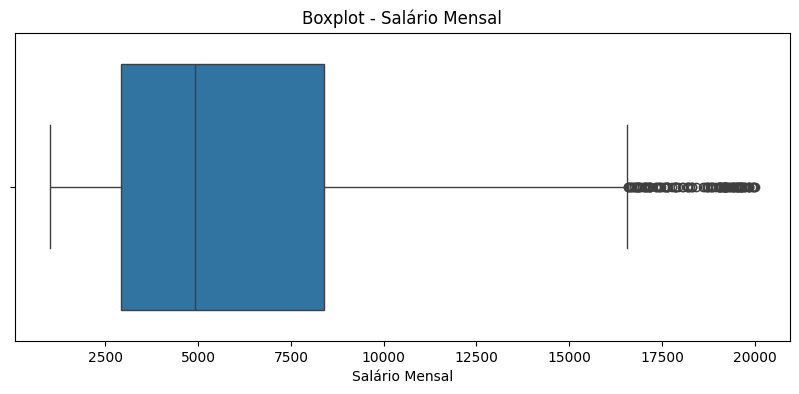

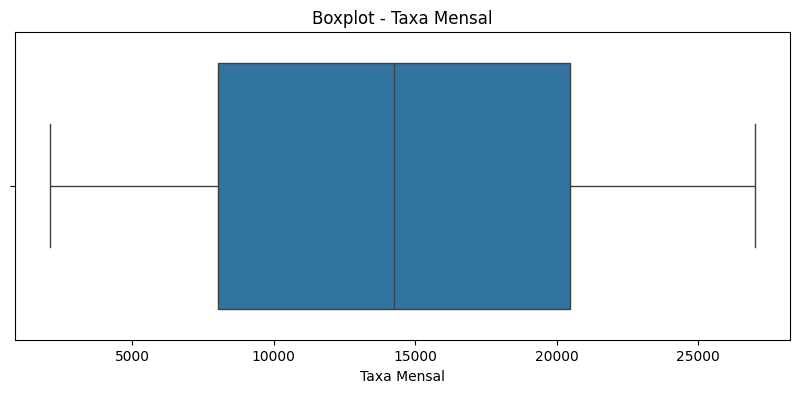

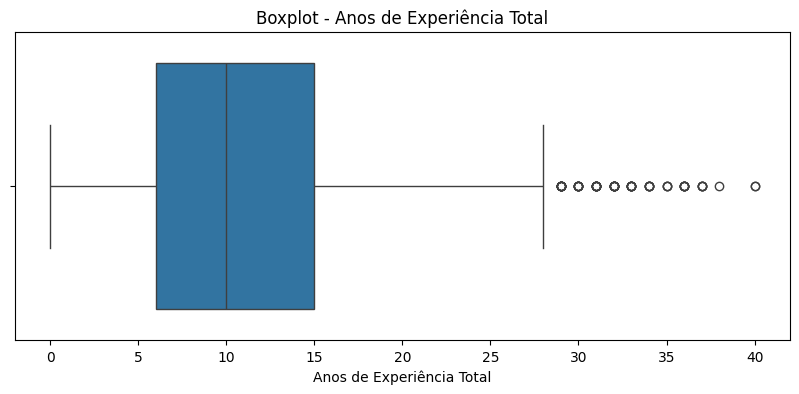

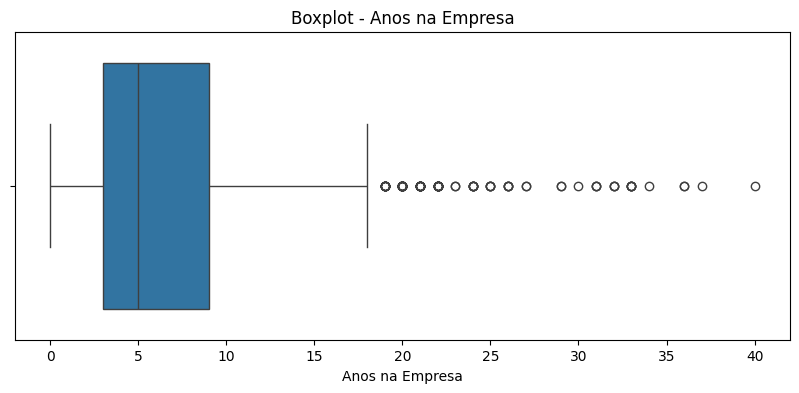

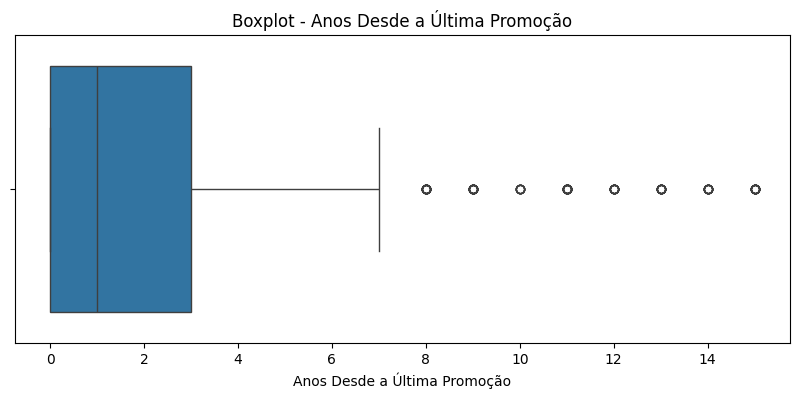

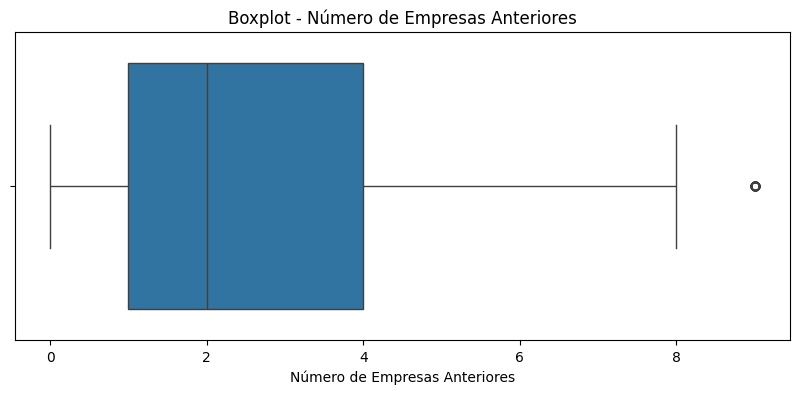

In [122]:
# Boxplot - Salário Mensal
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['salario_mensal'])
plt.title('Boxplot - Salário Mensal')
plt.xlabel('Salário Mensal')
plt.show()

# Boxplot - Taxa Mensal
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['taxa_mensal'])
plt.title('Boxplot - Taxa Mensal')
plt.xlabel('Taxa Mensal')
plt.show()

# Boxplot - Anos de Experiência Total
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['anos_experiencia_total'])
plt.title('Boxplot - Anos de Experiência Total')
plt.xlabel('Anos de Experiência Total')
plt.show()

# Boxplot - Anos na Empresa
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['anos_empresa'])
plt.title('Boxplot - Anos na Empresa')
plt.xlabel('Anos na Empresa')
plt.show()

# Boxplot - Anos desde a Última Promoção
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['anos_desde_ultima_promocao'])
plt.title('Boxplot - Anos Desde a Última Promoção')
plt.xlabel('Anos Desde a Última Promoção')
plt.show()

# Boxplot - Número de Empresas Anteriores
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['num_empresas_anteriores'])
plt.title('Boxplot - Número de Empresas Anteriores')
plt.xlabel('Número de Empresas Anteriores')
plt.show()

*   Salário Mensal: apresenta alguns salários muito altos, mas isso provavelmente está sugerindo a presença de cargos de liderança ou executivos na empresa (voltando na análise das variáveis categóricas é possível perceber que isso é correto).

*   Taxa Mensal: o gráfico mostra uma distribuição relativamente equilibrada, indicando que a maioria dos funcionários tem custos mensais semelhantes.

*   Anos de Experiência Total: revela que a maioria está no meio da carreira, mas há alguns profissionais com longa experiência.

*   Anos na Empresa: indica que muitos funcionários têm pouco tempo de casa, mas há casos de longa permanência, o que é plausível.

*   Anos Desde a Última Promoção: mostra que a maior parte dos funcionários foi promovida recentemente, mas existem aqueles que estão há muito tempo sem promoção.

*   Número de Empresas Anteriores: revela perfis variados, com funcionários que mudaram pouco e outros com histórico de maior rotatividade.

# Análise Exploratória (EDA)

Para a análise exploratória irei utilizar uma integração do SQL ao Python pois o SQL é declarativo, então as consultas deixam mais clara a lógica de análise.

In [123]:
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head()

,idade,deixou_a_empresa,viagem_trabalho,salario_diario,departamento,distancia_casa,nivel_educacional,nivel_educacional_nome,area_formacao,contagem_funcionario,numero_funcionario,satisfacao_ambiente,satisfacao_ambiente_nome,genero,salario_hora,envolvimento_trabalho,envolvimento_trabalho_nome,nivel_cargo,cargo,satisfacao_trabalho,satisfacao_trabalho_nome,estado_civil,salario_mensal,taxa_mensal,num_empresas_anteriores,maior_18_anos,faz_hora_extra,aumento_salarial_pct,avaliacao_desempenho,avaliacao_desempenho_nome,satisfacao_relacionamentos,satisfacao_relacionamentos_nome,horas_padrao,nivel_acoes,anos_experiencia_total,treinamentos_ultimo_ano,equilibrio_vida_trabalho,equilibrio_vida_trabalho_nome,anos_empresa,anos_cargo_atual,anos_desde_ultima_promocao,anos_com_gerente_atual
0,41,Sim,Viaja Raramente,1102,Vendas,1,2,faculdade,Ciências Biológicas,1,1,2,media,Feminino,94,3,alto,2,Executivo de Vendas,4,muito_alta,Solteiro(a),5993,19479,8,Y,Sim,11,3,excelente,1,baixa,80,0,8,0,1,ruim,6,4,0,5
1,49,Não,Viaja Frequentemente,279,Pesquisa e Desenvolvimento,8,1,abaixo_faculdade,Ciências Biológicas,1,2,3,alta,Masculino,61,2,medio,2,Cientista Pesquisador,2,media,Casado(a),5130,24907,1,Y,Não,23,4,excepcional,4,muito_alta,80,1,10,3,3,melhor,10,7,1,7
2,37,Sim,Viaja Raramente,1373,Pesquisa e Desenvolvimento,2,2,faculdade,Outro,1,4,4,muito_alta,Masculino,92,2,medio,1,Técnico de Laboratório,3,alta,Solteiro(a),2090,2396,6,Y,Sim,15,3,excelente,2,media,80,0,7,3,3,melhor,0,0,0,0
3,33,Não,Viaja Frequentemente,1392,Pesquisa e Desenvolvimento,3,4,mestrado,Ciências Biológicas,1,5,4,muito_alta,Feminino,56,3,alto,1,Cientista Pesquisador,3,alta,Casado(a),2909,23159,1,Y,Sim,11,3,excelente,3,alta,80,0,8,3,3,melhor,8,7,3,0
4,27,Não,Viaja Raramente,591,Pesquisa e Desenvolvimento,2,1,abaixo_faculdade,Medicina,1,7,1,baixa,Masculino,40,3,alto,1,Técnico de Laboratório,2,media,Casado(a),3468,16632,9,Y,Não,12,3,excelente,4,muito_alta,80,1,6,3,3,melhor,2,2,2,2


In [124]:
# Quantidade de funcionários que deixaram a empresa:
resultado = duckdb.query("""
    SELECT
      deixou_a_empresa,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    GROUP BY deixou_a_empresa
""").to_df()
print(resultado)


  deixou_a_empresa  quantidade
0              Sim         237
1              Não        1233


Perfil dos colaboradores que deixaram a empresa:

In [125]:
# Gênero
resultado = duckdb.query("""
    SELECT
      genero,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY genero, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado)

      genero  quantidade
0  Masculino         150
1   Feminino          87


In [126]:
# Estado civil
resultado = duckdb.query("""
    SELECT
      estado_civil,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY estado_civil, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado)

    estado_civil  quantidade
0    Solteiro(a)         120
1      Casado(a)          84
2  Divorciado(a)          33


In [127]:
# Educação
resultado = duckdb.query("""
    SELECT
      nivel_educacional_nome,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY nivel_educacional_nome, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado)

  nivel_educacional_nome  quantidade
0            bacharelado          99
1               mestrado          58
2              faculdade          44
3       abaixo_faculdade          31
4              doutorado           5


In [133]:
# Idade
df['Faixa_Etaria'] = pd.cut(
    df['idade'],
    bins=[0, 24, 34, 44, 54, float('inf')],
    labels=['Menos de 25', '25-34', '35-44', '45-54', '55 ou mais']
)
resultado = (
    df[df['deixou_a_empresa'] == 'Yes']
    .groupby('Faixa_Etaria')
    .size()
    .reset_index(name='Quantidade_total')
)

/tmp/ipython-input-133-2147794179.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Faixa_Etaria')


Perfil majoritário dos colaboradores que deixaram a empresa:
*   Homens
*   Solteiro (a)
*   Com nível de bacharel e mestre

In [77]:
# Rotatividade por departamento
resultado = duckdb.query("""
    SELECT
      departamento,
      COUNT(deixou_a_empresa) as quantidade
    FROM df
    WHERE deixou_a_empresa = 'Sim'
    GROUP BY departamento, deixou_a_empresa
    ORDER BY quantidade DESC
""").to_df()
print(resultado)

                 departamento  quantidade
0  Pesquisa e Desenvolvimento         133
1                      Vendas          92
2            Recursos Humanos          12


A query revela inicialmmente que existe baixa rotatividade no setor de recursos humanos em comparação com os setores de Pesquisa e Desenvolvimento e Vendas.